In [8]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df = df.dropna()


In [9]:

# Define Tejo and Douro

df = df[ (df['Catchment_name'] == 'Tejo') | (df['Catchment_name'] == "Douro")]

# Subset the database - environmental variables

var = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
df = df[var]
df = df.reset_index(drop=True)
print(df)

# Standardize the data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA

pca = PCA()
pca.fit(df_scaled)

# Get the principal components and explained variance ratio

principal_components = pca.transform(df_scaled)
explained_variance_ratio = pca.explained_variance_ratio_


     Altitude  Actual_river_slope  Elevation_mean_catch  prec_ann_catch  \
0        1179               0.001           1687.103217      810.092422   
1        1038               2.258           1293.238318      650.030528   
2         636               0.263            967.398405      513.949149   
3         890               2.909           1088.329483      553.756064   
4         872               3.530            985.273741      518.863081   
..        ...                 ...                   ...             ...   
502        38               0.100            704.675069      515.039678   
503        26               0.100            702.673201      516.097287   
504        20               0.100            697.730192      518.386401   
505        13               0.100            679.784324      556.028518   
506        13               0.100            678.426582      556.481186   

     temp_ann  temp_jan  temp_jul  
0         9.3       1.4      18.4  
1        10.4       2.2    

# 8.2

c:\Users\Utilizador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\Utilizador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


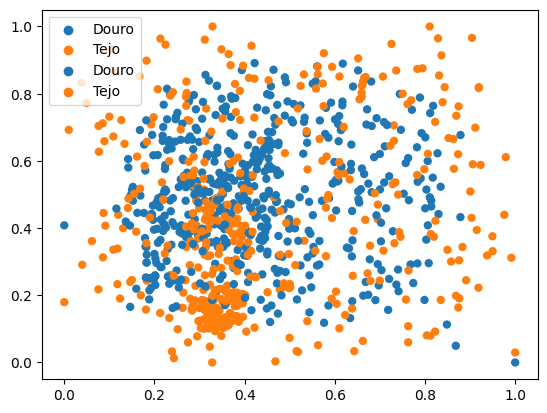

In [10]:

df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df = df.dropna()

# Subset the database - Douro and Tejo basins

df = df[ (df['Catchment_name'] == 'Tejo') | (df['Catchment_name'] == "Douro")]

# Select only numeric columns
numeric_columns = df.select_dtypes(include=np.number)

# Calculate dissimilarity matrix
dissimilarity_matrix = pairwise_distances(numeric_columns, metric='euclidean')

# Perform MDS
mds = MDS(n_components=2, dissimilarity='precomputed')
mds_result = mds.fit_transform(dissimilarity_matrix)

# Perform NMDS
nmds_result = MDS(n_components=2, dissimilarity='precomputed', metric=False, n_init=100).fit_transform(dissimilarity_matrix)

# Normalize the coordinates for better visualization
scaler = MinMaxScaler()
mds_result_scaled = scaler.fit_transform(mds_result)
nmds_result_scaled = scaler.fit_transform(nmds_result)

# Plotting MDS results
sns.scatterplot(x=mds_result_scaled[:,0],
              y=mds_result_scaled[:,1],
              hue = df['Catchment_name'].tolist(),
              linewidth=0,
              )



# Plotting NMDS results
sns.scatterplot(x=nmds_result_scaled[:,0],
              y=nmds_result_scaled[:,1],
              hue = df['Catchment_name'].tolist(),
              linewidth=0,
              )

plt.show()